In [29]:
import pandas as pd
from sklearn.preprocessing import Normalizer, StandardScaler
import xgboost as xgb

In [30]:
from libs.predictor_util import modelfit
from libs.plot_utils import plot_confusion_matrix, analysing_feature_importance
from libs.transformer_utils import process_features_standardisation, encode_labels, one_hot_encode_field

## 1. Load the Data set

In [31]:
df = pd.read_csv('../data/outputs/07_dataset_processed.csv')

In [32]:
df.shape
df.head()

,driverId,constructorId,race_rank,statusId,round,constructor_races_won,constructor_avg_point,constructor_times_in_top_10,driver_avg_speed,race_end_in_2019,...,circuitId_70,circuitId_71,circuitId_73,circuitId_75,circuitId_76,circuitId_77,circuitId_78,circuitId_79,constructor_is_active_1,driver_is_active_1
0,1,1,1,1,1,179,2,1110,4,0.010394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2,2,2,1,1,1,2,91,4,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,3,1,1,114,2,764,2,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,4,4,1,1,35,2,390,4,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,5,1,1,179,2,1110,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
df = encode_labels(df, ['race_rank'])

## 2. Fit the model

In [34]:
target = 'race_rank'
id_col = 'resultId'
features = [x for x in df.columns if x not in [target, id_col]]

In [35]:
xgb_model = xgb.XGBClassifier(
    n_estimators=205,
    learning_rate=0.001,
    max_depth=120,
    eta= 0.18,
    subsample= .8,
    colsample_bytree= 0.8,
    objective= 'multi:softmax',
    eval_metric='merror',
    min_child_weight = 9,
    gamma = 0,
    n_jobs=-1,
    num_class= 25,
    enable_categorical=True,
    seed=80,
)
# best_params = {'colsample_bytree': 0.8, 'eta': 0.01, 'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 205, 'objective': 'multi:softmax', 'seed': 80, 'subsample': 0.5}

In [36]:
model = modelfit(df, features, target, xgb_model)


Model Report
Accuracy : 0.1489
AUC Score (Train): 0.912655
AUC Score (Test): 0.855419


## 6. Analysing the model output

### 6.1. Classification report

In [37]:
print("Classification Report:")
print(model[4])

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.73      0.54       318
           1       0.26      0.24      0.25       355
           2       0.23      0.28      0.25       332
           3       0.17      0.17      0.17       327
           4       0.11      0.09      0.10       330
           5       0.14      0.17      0.15       331
           6       0.10      0.07      0.08       313
           7       0.10      0.08      0.09       337
           8       0.12      0.12      0.12       323
           9       0.13      0.14      0.13       331
          10       0.10      0.08      0.09       323
          11       0.11      0.07      0.09       343
          12       0.13      0.05      0.07       339
          13       0.06      0.03      0.04       303
          14       0.11      0.11      0.11       314
          15       0.08      0.04      0.06       346
          16       0.11      0.12      0.12       313
    

In [38]:
# import numpy as np
# classification_report_lines = model[4].strip().split('\n')[2:-4]
# precision, recall, f1, support = [], [], [], []
# for line in classification_report_lines:
#     print(line)
#     line = line.split()
#     precision.append(float(line[1]))
#     recall.append(float(line[2]))
#     f1.append(float(line[3]))
#     support.append(int(line[4]))

# # Calcul des poids de classe inverses
# class_weights = np.sum(support) / (len(support) * np.array(support))

In [39]:
# model = modelfit(df, features, target, xgb_model, class_weights)

In [40]:
# print("Classification Report:")
# print(model[4])

### 6.2. Confuxion Matrix

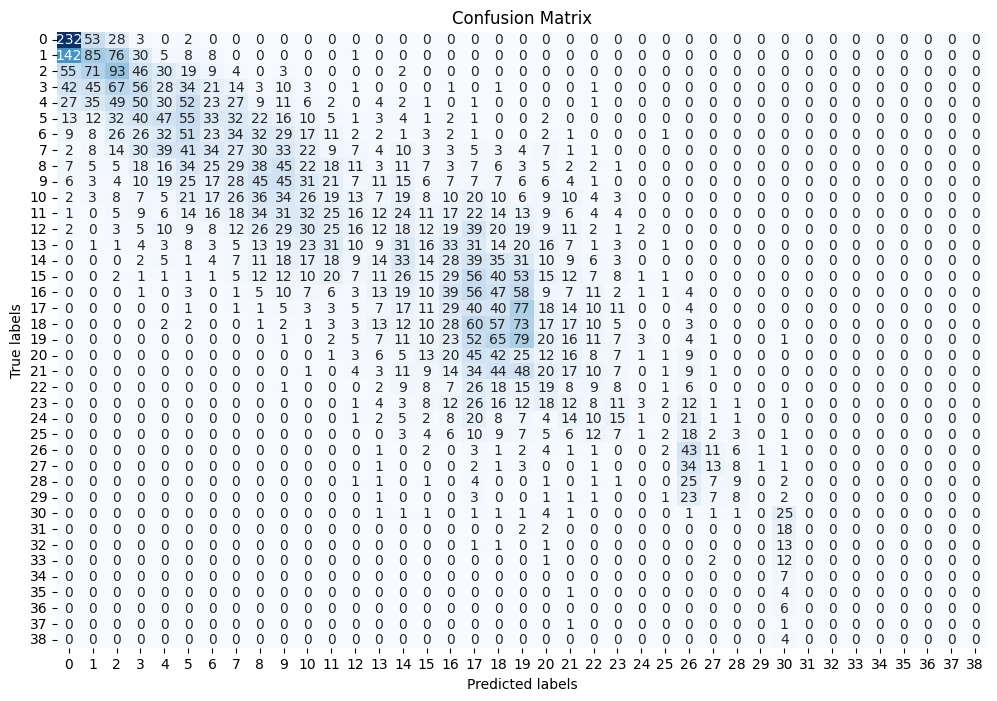

In [41]:
plot_confusion_matrix((model[1], model[2]))

### 6.4. Feature importance

In [42]:
feature_imp_serie = pd.Series(model[0].get_booster().get_fscore()).sort_values(ascending=False)

In [43]:
analysing_feature_importance(feature_imp_serie)

## 7. Test the model with specifics data

In [44]:
df_to_predict_later.iloc[5:13]

,driverId,constructorId,race_rank,statusId,round,constructor_races_won,constructor_avg_point,constructor_times_in_top_10,driver_avg_speed,race_end_in_2019,...,circuitId_70,circuitId_71,circuitId_73,circuitId_75,circuitId_76,circuitId_77,circuitId_78,circuitId_79,constructor_is_active_1,driver_is_active_1
5,5,2,14,10,0,7,2,1170,2,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,4,12,4,0,1,1,208,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,5,4,4,0,92,2,2251,5,0.002972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,8,1,9,3,0,2,2,98,3,0.000996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,6,13,2,0,3,1,175,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10,7,15,6,0,0,1,9,5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,11,3,16,7,0,14,2,576,1,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,12,5,6,4,0,92,2,2251,3,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
model[0].predict(df_to_predict_later.iloc[5:13].drop('race_rank', axis=1))

ValueError: feature_names mismatch: ['driverId', 'constructorId', 'statusId', 'round', 'constructor_races_won', 'constructor_avg_point', 'constructor_times_in_top_10', 'driver_avg_speed', 'race_end_in_2019', 'race_end_in_2020', 'race_end_in_2021', 'race_end_in_2022', 'race_end_in_2023', 'driver_most_won_circuit_id', 'driver_nber_of_races_won', 'driver_nber_of_times_in_top_10', 'season_age', 'grid_1', 'grid_2', 'grid_3', 'grid_4', 'grid_5', 'grid_6', 'grid_7', 'grid_8', 'grid_9', 'grid_10', 'grid_11', 'grid_12', 'grid_13', 'grid_14', 'grid_15', 'grid_16', 'grid_17', 'grid_18', 'grid_19', 'grid_20', 'grid_21', 'grid_22', 'grid_23', 'grid_24', 'grid_25', 'grid_26', 'grid_27', 'grid_28', 'grid_29', 'grid_30', 'grid_31', 'grid_32', 'grid_33', 'grid_34', 'circuitId_2', 'circuitId_3', 'circuitId_4', 'circuitId_5', 'circuitId_6', 'circuitId_7', 'circuitId_8', 'circuitId_9', 'circuitId_10', 'circuitId_11', 'circuitId_12', 'circuitId_13', 'circuitId_14', 'circuitId_15', 'circuitId_16', 'circuitId_17', 'circuitId_18', 'circuitId_19', 'circuitId_20', 'circuitId_21', 'circuitId_22', 'circuitId_24', 'circuitId_25', 'circuitId_26', 'circuitId_27', 'circuitId_28', 'circuitId_29', 'circuitId_30', 'circuitId_31', 'circuitId_32', 'circuitId_33', 'circuitId_34', 'circuitId_35', 'circuitId_36', 'circuitId_37', 'circuitId_38', 'circuitId_39', 'circuitId_40', 'circuitId_41', 'circuitId_42', 'circuitId_43', 'circuitId_44', 'circuitId_45', 'circuitId_46', 'circuitId_47', 'circuitId_48', 'circuitId_49', 'circuitId_50', 'circuitId_51', 'circuitId_52', 'circuitId_53', 'circuitId_54', 'circuitId_55', 'circuitId_56', 'circuitId_57', 'circuitId_58', 'circuitId_59', 'circuitId_60', 'circuitId_61', 'circuitId_62', 'circuitId_63', 'circuitId_64', 'circuitId_65', 'circuitId_66', 'circuitId_67', 'circuitId_68', 'circuitId_69', 'circuitId_70', 'circuitId_71', 'circuitId_73', 'circuitId_75', 'circuitId_76', 'circuitId_77', 'circuitId_78', 'circuitId_79', 'constructor_is_active_1', 'driver_is_active_1'] ['driverId', 'constructorId', 'statusId', 'round', 'constructor_races_won', 'constructor_avg_point', 'constructor_times_in_top_10', 'driver_avg_speed', 'race_end_in_2019', 'race_end_in_2020', 'race_end_in_2021', 'race_end_in_2022', 'race_end_in_2023', 'driver_most_won_circuit_id', 'driver_nber_of_races_won', 'driver_nber_of_times_in_top_10', 'season_age', 'grid_1', 'grid_2', 'grid_3', 'grid_4', 'grid_5', 'grid_6', 'grid_7', 'grid_8', 'grid_9', 'grid_10', 'grid_11', 'grid_12', 'grid_13', 'grid_14', 'grid_15', 'grid_16', 'grid_17', 'grid_18', 'grid_19', 'grid_20', 'grid_21', 'grid_22', 'grid_23', 'grid_24', 'circuitId_2', 'circuitId_3', 'circuitId_4', 'circuitId_5', 'circuitId_6', 'circuitId_7', 'circuitId_8', 'circuitId_9', 'circuitId_10', 'circuitId_11', 'circuitId_12', 'circuitId_13', 'circuitId_14', 'circuitId_15', 'circuitId_16', 'circuitId_17', 'circuitId_18', 'circuitId_19', 'circuitId_20', 'circuitId_21', 'circuitId_22', 'circuitId_24', 'circuitId_32', 'circuitId_34', 'circuitId_35', 'circuitId_39', 'circuitId_68', 'circuitId_69', 'circuitId_70', 'circuitId_71', 'circuitId_73', 'circuitId_75', 'circuitId_76', 'circuitId_77', 'circuitId_78', 'circuitId_79', 'constructor_is_active_1', 'driver_is_active_1']
expected circuitId_31, circuitId_49, grid_32, circuitId_33, circuitId_52, grid_33, circuitId_56, grid_27, circuitId_55, grid_29, circuitId_46, grid_31, circuitId_47, circuitId_25, circuitId_48, circuitId_36, circuitId_63, circuitId_45, circuitId_26, circuitId_28, circuitId_61, grid_30, grid_34, circuitId_67, circuitId_65, circuitId_64, circuitId_58, circuitId_66, circuitId_30, circuitId_43, circuitId_60, circuitId_53, grid_28, circuitId_51, circuitId_50, circuitId_62, circuitId_42, circuitId_44, circuitId_38, circuitId_29, circuitId_40, circuitId_59, grid_26, circuitId_37, circuitId_27, circuitId_57, circuitId_54, grid_25, circuitId_41 in input data